# **EPS - CA 2**
Fereshte Bagheri - 810100089

#**Q1** : Conditional Distribution

1-

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import binom
import numpy as np
import scipy.stats as stats
from time import sleep
from IPython import display


df = pd.read_csv('Tarbiat.csv')


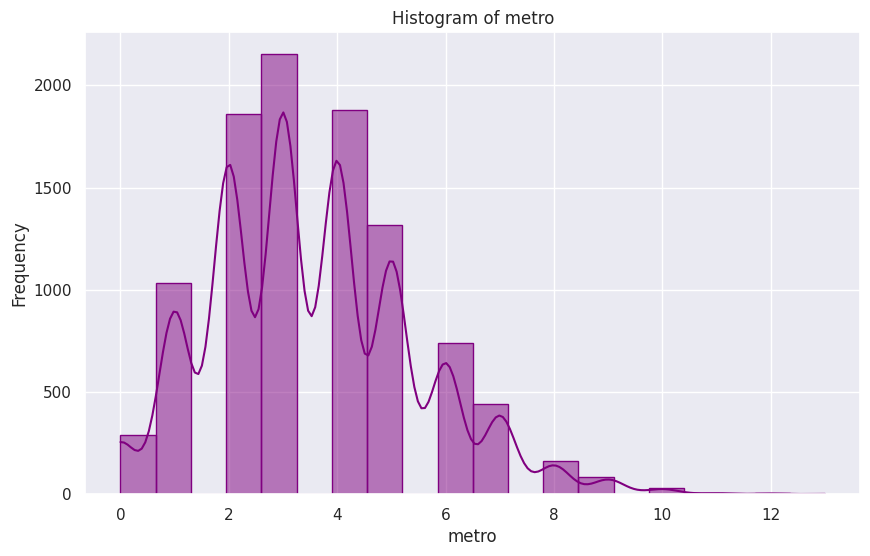

In [84]:
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.histplot(df['metro'], bins=20, color='purple', edgecolor='purple', kde=True)
plt.title('Histogram of metro')
plt.xlabel('metro')
plt.ylabel('Frequency')
plt.show()

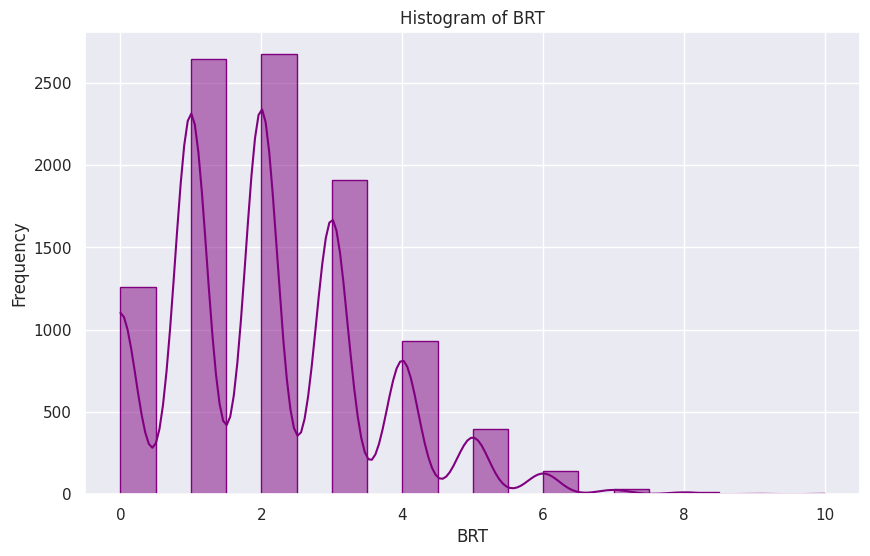

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BRT'], bins=20, color='purple', edgecolor='purple', kde=True)
plt.title('Histogram of BRT')
plt.xlabel('BRT')
plt.ylabel('Frequency')
plt.show()

2- The distribution of the number of metros or BRTs that pass in a time unit is poisson and the mean are calculated below:

In [86]:
lambda_metro = (df['metro'].mean())
lambda_brt = (df['BRT'].mean())

print(f"Lambda for metro: {lambda_metro}")
print(f"Lambda for BRT: {lambda_brt}")


Lambda for metro: 3.5316
Lambda for BRT: 2.0636


3,4-

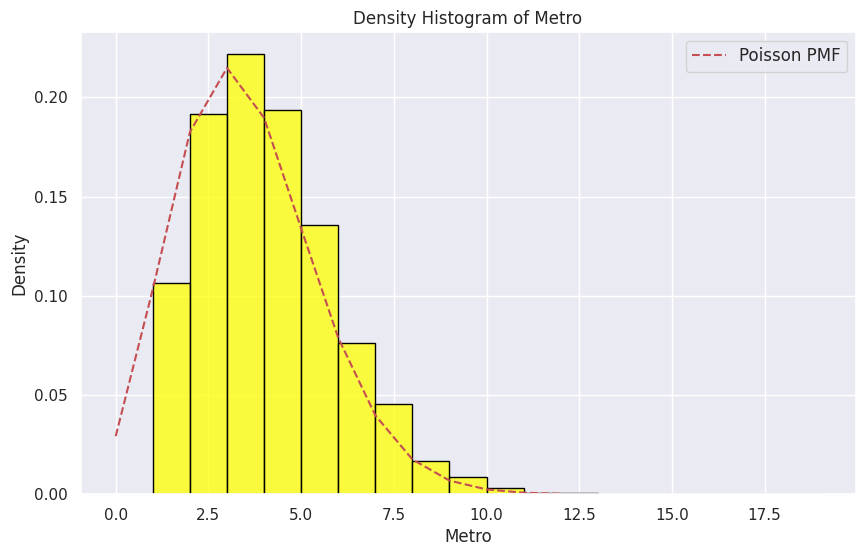

In [87]:

plt.figure(figsize=(10, 6))
sns.histplot(df['metro'], bins=range(1,20), color='yellow', edgecolor='black', kde=False, stat='density')
plt.title('Density Histogram of Metro', fontsize=12)
plt.xlabel('Metro', fontsize=12)
plt.ylabel('Density', fontsize=12)


x_values = range(0, df['metro'].max())
poisson_pmf = [poisson.pmf(x, lambda_metro) for x in x_values]
plt.plot(x_values, poisson_pmf, 'r--', label='Poisson PMF')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


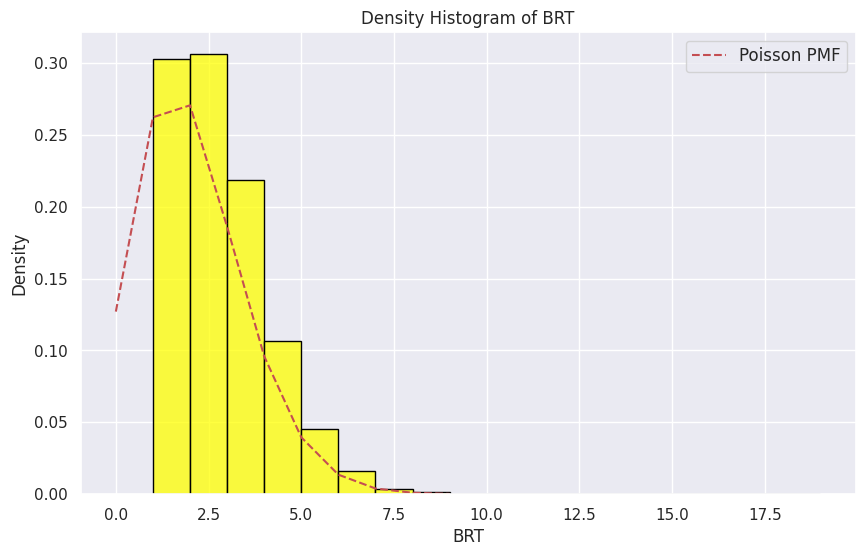

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BRT'], bins=range(1,20), color='yellow', edgecolor='black', kde=False, stat='density')
plt.title('Density Histogram of BRT', fontsize=12)
plt.xlabel('BRT', fontsize=12)
plt.ylabel('Density', fontsize=12)


x_values = range(0, df['BRT'].max())
poisson_pmf = [poisson.pmf(x, lambda_brt) for x in x_values]
plt.plot(x_values, poisson_pmf, 'r--', label='Poisson PMF')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


5- z is sum of two independent random variables so it has poisson distribution too.

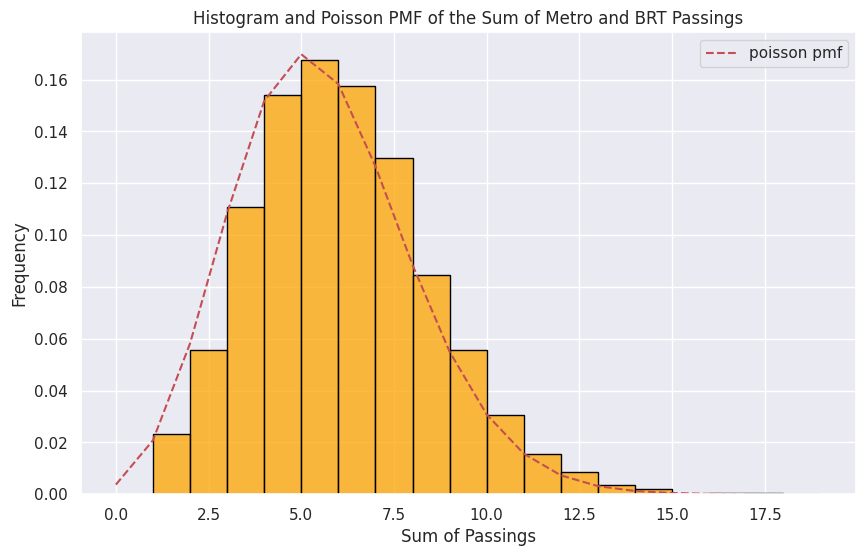

In [93]:
df['sum'] = df['metro'] + df['BRT']
plt.figure(figsize=(10, 6))
sns.histplot(df['sum'], bins=range(1,20), color='orange', edgecolor='black', kde=False, stat='density')

lambda_z = lambda_metro + lambda_brt
z = range(df['sum'].min(), df['sum'].max())
pmf = poisson.pmf(z, lambda_z)


plt.plot(z, pmf, 'r--', label='poisson pmf')
plt.title('Histogram and Poisson PMF of the Sum of Metro and BRT Passings')
plt.xlabel('Sum of Passings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

6- W ~ P(X = k | X + Y = n) is a binomial distribution:

$$P(X=k, Y=n-k) = P(X=k)P(Y=n-k) = \frac{e^{-\lambda_1}\lambda_1^k}{k!} \cdot \frac{e^{-\lambda_2}\lambda_2^{n-k}}{(n-k)!}$$


$$P(X+Y=n) = e^{-(\lambda_1+\lambda_2)}\frac{(\lambda_1+\lambda_2)^n}{n!}$$



$$P(X=k|X+Y=n) = \frac{P(X=k, Y=n-k)}{P(X+Y=n)} = \frac{e^{-\lambda_1}\lambda_1^k}{k!} \cdot \frac{e^{-\lambda_2}\lambda_2^{n-k}}{(n-k)!} \cdot \frac{n!}{e^{-(\lambda_1+\lambda_2)}(\lambda_1+\lambda_2)^n}$$


$$P(X=k|X+Y=n) = \frac{n!}{k!(n-k)!} \left(\frac{\lambda_1}{\lambda_1+\lambda_2}\right)^k \left(\frac{\lambda_2}{\lambda_1+\lambda_2}\right)^{n-k}$$

$$P(X=k|X+Y=n) \sim B(n, \frac{\lambda_1}{\lambda_1 + \lambda_2})$$


7-

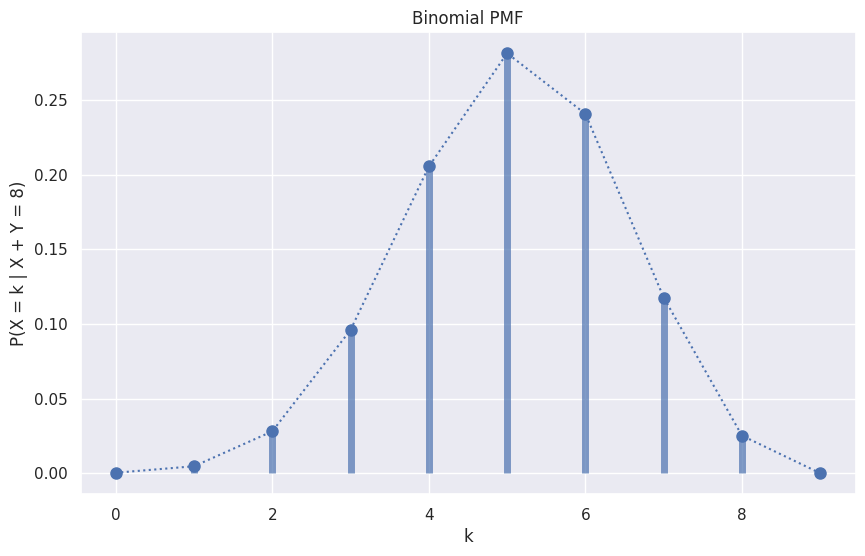

In [94]:

n =8
p = lambda_metro / (lambda_metro + lambda_brt)

x = range(n+2)
pmf = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))

plt.plot(x, pmf, 'b:')
plt.title('Binomial PMF')
plt.xlabel('k')
plt.ylabel('Frequency')

plt.plot(x, pmf, 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, pmf, colors='b', lw=5, alpha=0.7)

plt.ylabel('P(X = k | X + Y = 8)')

plt.show()


8- It is obvious that the pmf of calculated binomial distribution and the density histogram of W are nearly identical.

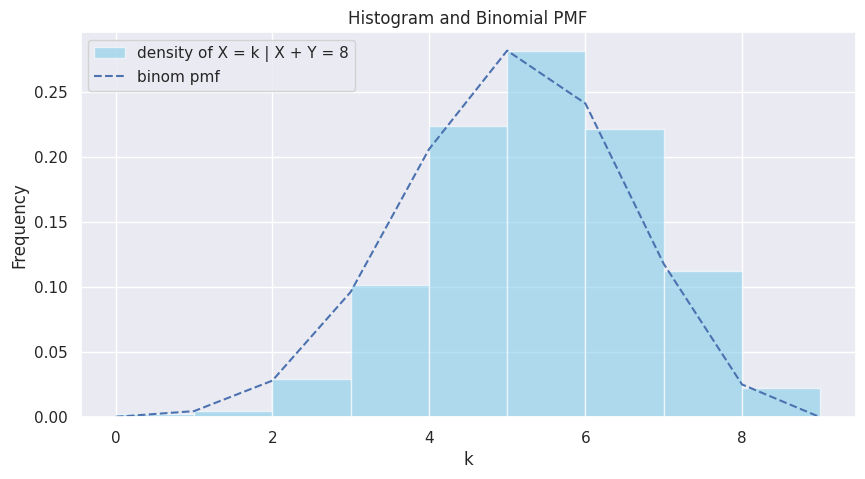

In [95]:
df_filtered = df[df['sum'] == n]

plt.figure(figsize=(10, 5))
plt.hist(df_filtered['metro'], bins=range(n+2), density=True, alpha=0.6, color='skyblue' , label="density of X = k | X + Y = 8")

pmf = binom.pmf(x, n, p)

plt.plot(x, pmf, 'b--', label='binom pmf')
plt.title('Histogram and Binomial PMF')
plt.xlabel('k')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#**Q2** : Moment Generating Function

1-

In [97]:
def coupon_collector(n, k):
    total = 0
    for i in range(k):
        coupons = set()
        count = 0
        while len(coupons) < n:
            coupons.add(np.random.randint(n))
            count += 1
        total += count
    return total / k



2- We can see that the values converge to 29


In [111]:
for k in [10, 100, 1000,10000]:
    print(f"Expected value for n = 10 and k = {k}: {coupon_collector(10, k)}")

Expected value for n = 10 and k = 10: 26.1
Expected value for n = 10 and k = 100: 29.66
Expected value for n = 10 and k = 1000: 28.831
Expected value for n = 10 and k = 10000: 29.4063


3-
$X_i$ is the number of coupons that have to be observed that the i-th type of coupon is seen after seeing the (i-1)-th coupon.
So, to collect all n coupons, we need

$$X = X_1 + X_2 + \ldots + X_n.$$

The expected value of x is the sum of the expected values of each $X_i$:

$$E[X] = E[X_1] + E[X_2] + \ldots + E[X_n].$$

This is known as the linearity of expectations.

After collecting k - 1 coupons, for the next purchase:

- Failure = getting a coupon you already have. There are k - 1 choices.
- Success = getting a new coupon. There are n - k + 1 choices.

Then $X_i$ is a geometric random variable with success probability p = (n - k + 1) / n.

So, the expected value of $X_i$ is the reciprocal of p:

$$E[Xi] = \frac{1}{p} = \frac{n}{n - k + 1}.$$



Therefore, we have:

$$E[X] = E[X_1] + E[X_2] + \ldots + E[X_n] = \frac{n}{n} + \frac{n}{n - 1} + \frac{n}{n - 2} + \ldots + \frac{n}{1}.$$

This is a harmonic series, and E[X] can be approximated by the integral of 1/x from 1 to n, which is n * log(n):

$$E[X] \approx n \int_{1}^{n} \frac{1}{x} dx = n \log n.$$

This approximation becomes more accurate as n increases.



$$P(X=k) = p(1-p)^{k-1}$$

2. The moment generating function (MGF) of a random variable X is defined as:

$$M_X(s) = E(e^{sX}) = \sum_{k=1}^{\infty} P(X=k) e^{ks}$$



$$\sum_{k=1}^{\infty} P(X=k) e^{sk} = \sum_{k=1}^{\infty} p(1-p)^{k-1} e^{ks} = \frac{p}{1-p} \sum_{k=1}^{\infty} ((1-p)e^s)^k$$

$$M_X(s) = \frac{pe^s}{1-e^s(1-p)}$$

since we know that $ p = \frac{n-i + 1}{n} $ for $X_i$ so the MGF function is as defined in the code.

In [113]:
import sympy
from sympy import init_printing, symbols, latex, pprint
from IPython.display import display, Math

s = sympy.symbols('s')

n = 10
mgf_Xi = []
for i in range(1,n+1):
  mgf_Xi.append(((n - i + 1)*sympy.exp(s))/(n - sympy.exp(s)*(i-1)))

mgf_X = sympy.prod(mgf_Xi)
mean_X = mgf_X.diff(s).subs(s, 0)


print("Expected value of X : ",mean_X.evalf())
print()


print("### second method ###")
exi = [mgf_Xi[i].diff(s).subs(s, 0) for i in range(n)]
print(exi)
print("Expected value of X : ",sum(exi).evalf())

Expected value of X :  29.2896825396825

### second method ###
[1, 10/9, 5/4, 10/7, 5/3, 2, 5/2, 10/3, 5, 10]
Expected value of X :  29.2896825396825


4- The MGF of X is equal to:

$$\frac{362880 e^{10 s}}{\left(10 - 9 e^{s}\right) \left(10 - 8 e^{s}\right) \left(10 - 7 e^{s}\right) \left(10 - 6 e^{s}\right) \left(10 - 5 e^{s}\right) \left(10 - 4 e^{s}\right) \left(10 - 3 e^{s}\right) \left(10 - 2 e^{s}\right) \left(10 - e^{s}\right)}$$

5- As given in the code result, the expected value of X is 29.2896825396825 which is equal to nlogn for n= 10  

# **Q3** : Bayesian Estimation

1-

In [140]:
df_digits = pd.read_csv('digits.csv')
df_digits.iloc[:, 1:] = df_digits.iloc[:, 1:].applymap(lambda x: 1 if x >= 128 else 0)

digit_201 = df_digits.iloc[200].copy()
digit_202 = df_digits.iloc[201].copy()

df_digits = df_digits.drop([200, 201])


2-

In [119]:



# indices = df_digits[df_digits == 1].stack().index.tolist()
# for index in indices:
#     row, col = index
#     print(f"Row {row}, Column {col} is 1")


3-

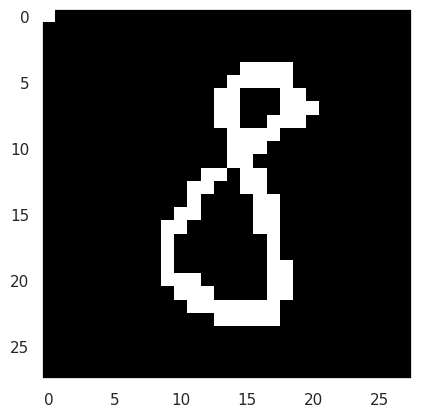

In [130]:
random_digit = df_digits.sample(1)
image = random_digit.iloc[0, :-1].values.reshape(28, 28)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.grid(False)
plt.show()


4-

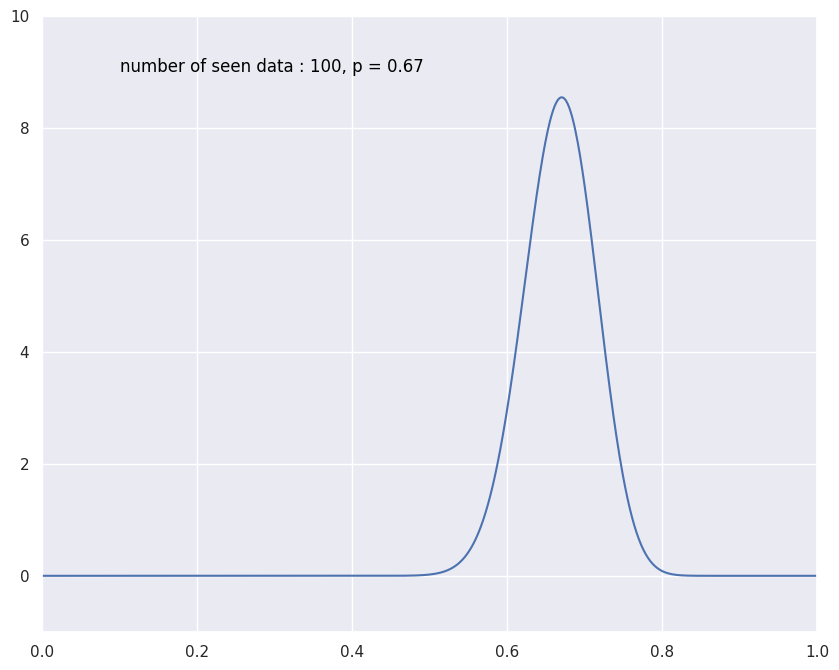


Mode of the posterior distribution: 0.67


<Figure size 1000x800 with 0 Axes>

In [134]:
t = 1000
p = np.linspace(0,1,t)

a = b = 1

def update(a: int, b: int, n: bool) -> np.array:
    a += n
    b += 1 - n
    post = stats.beta.pdf(p, a, b)
    return post, a, b

plt.figure(figsize=(10,8))
for i in range(100):
    n =  df_digits[df_digits['label'] == 8].iloc[i, df_digits.columns.get_loc('pixel404')]
    fy, a, b = update(a, b, n)

    # dynamic plot
    plt.plot(p, fy, 'b', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='black')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)

mode = (a - 1) / (a + b - 2)
print()
print("Mode of the posterior distribution:", mode)



5-

In [141]:
mean_pixels_label_8 = df_digits[df_digits['label'] == 8].iloc[:, 1:].mean()
mean_pixels_label_9 = df_digits[df_digits['label'] == 9].iloc[:, 1:].mean()

mean_pixels_label_8 = np.array(mean_pixels_label_8)
mean_pixels_label_9 = np.array(mean_pixels_label_9)

# print(mean_pixels_label_8)
# print(mean_pixels_label_9)


6-

In [147]:
pixels_201 = digit_201.iloc[1:]
pixels_202 = digit_202.iloc[1:]



def calculate_p_X_given_label(pixels ,label):
    if label == 8:
        p_xi_given_label = mean_pixels_label_8
    elif label == 9:
        p_xi_given_label = mean_pixels_label_9


    return np.prod(p_xi_given_label**pixels * (1-p_xi_given_label)**(1-pixels))


P_label_8 = len(df_digits[df_digits['label'] == 8]) / len(df_digits)
P_label_9 = len(df_digits[df_digits['label'] == 9]) / len(df_digits)

px201_8 = calculate_p_X_given_label(pixels_201, 8);
px201_9 = calculate_p_X_given_label(pixels_201, 9);

px202_8 = calculate_p_X_given_label(pixels_202, 8);
px202_9 = calculate_p_X_given_label(pixels_202, 9);

p8_x201 = (px201_8 * P_label_8) / (px201_8 * P_label_8 + px201_9 * P_label_9)
p8_x202 = (px202_8 * P_label_8) / (px202_8 * P_label_8 + px202_9 * P_label_9)

p9_x201 = (px201_9 * P_label_9) / (px201_8 * P_label_8 + px201_9 * P_label_9)
p9_x202 = (px202_9 * P_label_9) / (px202_8 * P_label_8 + px202_9 * P_label_9)

print("Label = 8 | x201 : ", p8_x201)
print("Label = 8 | x202: ",p8_x202)
print("Label = 9 | x201 : ", p9_x201)
print("Label = 9 | x202 : ",p9_x202)

Label = 8 | x201 :  0.9997406457898158
Label = 8 | x202:  5.915116612170155e-19
Label = 9 | x201 :  0.00025935421018423725
Label = 9 | x202 :  1.0
